In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np

plt.style.use('fivethirtyeight')
elec_car= pd.read_csv('전기자동차_최종.csv', encoding = 'utf-8')
norm_car = pd.read_csv('일반자동차_최종.csv', encoding = 'utf-8')
elec_car

,지역,2018년1월,2018년2월,2018년3월,2018년4월,2018년5월,2018년6월,2018년7월,2018년8월,2018년9월,...,2020년3월,2020년4월,2020년5월,2020년6월,2020년7월,2020년8월,2020년9월,2020년10월,2020년11월,2020년12월
0,서울,1201,1202,1289,1408,1644,2041,2456,2850,3383,...,11507,12121,12476,13746,14322,15310,16414,16960,17284,17479
1,경기,833,851,964,1091,1355,1905,2296,2595,2884,...,11128,11661,11945,12952,13432,14236,15229,15499,15855,16149
2,인천,251,258,277,300,368,509,605,692,731,...,2737,2810,2863,3218,3421,3705,3945,4027,4304,4613
3,대구,638,630,747,822,1021,1698,2056,2392,2783,...,8617,8681,8759,8833,8940,8977,9067,9068,9077,9020
4,제주,3331,3346,3377,3491,3541,3862,4557,5019,6010,...,11451,11577,11729,11985,12096,12179,12299,12305,12337,12352


In [2]:
norm_car

,지역,2018년1월,2018년2월,2018년3월,2018년4월,2018년5월,2018년6월,2018년7월,2018년8월,2018년9월,...,2020년3월,2020년4월,2020년5월,2020년6월,2020년7월,2020년8월,2020년9월,2020년10월,2020년11월,2020년12월
0,서울,3117268,3116923,3115402,3118055,3118052,3118428,3119041,3118682,3120541,...,3113826,3116402,3120877,3127964,3132827,3132761,3135428,3136772,3139994,3139882
1,경기,5409838,5419112,5437891,5459424,5479881,5499897,5518936,5535028,5552738,...,5791468,5819029,5842708,5872113,5890314,5903412,5928322,5947859,5968972,5987977
2,인천,1518008,1522781,1527380,1532683,1537223,1543386,1548359,1552812,1557836,...,1637122,1654655,1657922,1662279,1666854,1663453,1663825,1666990,1671306,1671829
3,대구,1159141,1160456,1162406,1163398,1164869,1167576,1168986,1169411,1171070,...,1185276,1188143,1188459,1191829,1196129,1202928,1207658,1206921,1208576,1210176
4,제주,501053,504376,508813,513288,517886,522722,528281,532151,535682,...,595892,584992,589792,594394,600229,603689,608263,611747,615486,602990


In [3]:
#경기 행 추출
data_s = elec_car.loc[1] #elec_car 데이터프레임의 1번째 행 추출
ndata_s = norm_car.loc[1] #norm_car 데이터프레임의 1번째 행 추출
#print(data_s) 
#위의 열도 같이 출력된다
data_s = data_s.values.reshape(1,-1) #데이터 한줄로 만들기
data_s = data_s.tolist() #리스트로 보내기
data_s = sum(data_s, [])
data_s = data_s[1:]
#print(data_s)
ndata_s = ndata_s.values.reshape(1,-1) #데이터 한줄로 만들기
ndata_s = ndata_s.tolist() #리스트로 보내기
ndata_s = sum(ndata_s, [])
ndata_s = ndata_s[1:]
line=[]
data_i = elec_car.iloc[:0,1:] #년 월 시리즈 추출
for row in data_i:
    line.append(row[:])

In [4]:
percentage_s = []
for i in range(36):
    print(round((data_s[i]/ndata_s[i])*100,3))
    
    percentage_s.append(round((data_s[i]/ndata_s[i])*100,3))
#percentage_s.append(data_s[i] / ndata_s[i])
print(percentage_s)

0.015
0.016
0.018
0.02
0.025
0.035
0.042
0.047
0.052
0.059
0.067
0.07
0.07
0.071
0.083
0.093
0.105
0.116
0.127
0.133
0.139
0.147
0.154
0.159
0.159
0.167
0.192
0.2
0.204
0.221
0.228
0.241
0.257
0.261
0.266
0.27
[0.015, 0.016, 0.018, 0.02, 0.025, 0.035, 0.042, 0.047, 0.052, 0.059, 0.067, 0.07, 0.07, 0.071, 0.083, 0.093, 0.105, 0.116, 0.127, 0.133, 0.139, 0.147, 0.154, 0.159, 0.159, 0.167, 0.192, 0.2, 0.204, 0.221, 0.228, 0.241, 0.257, 0.261, 0.266, 0.27]


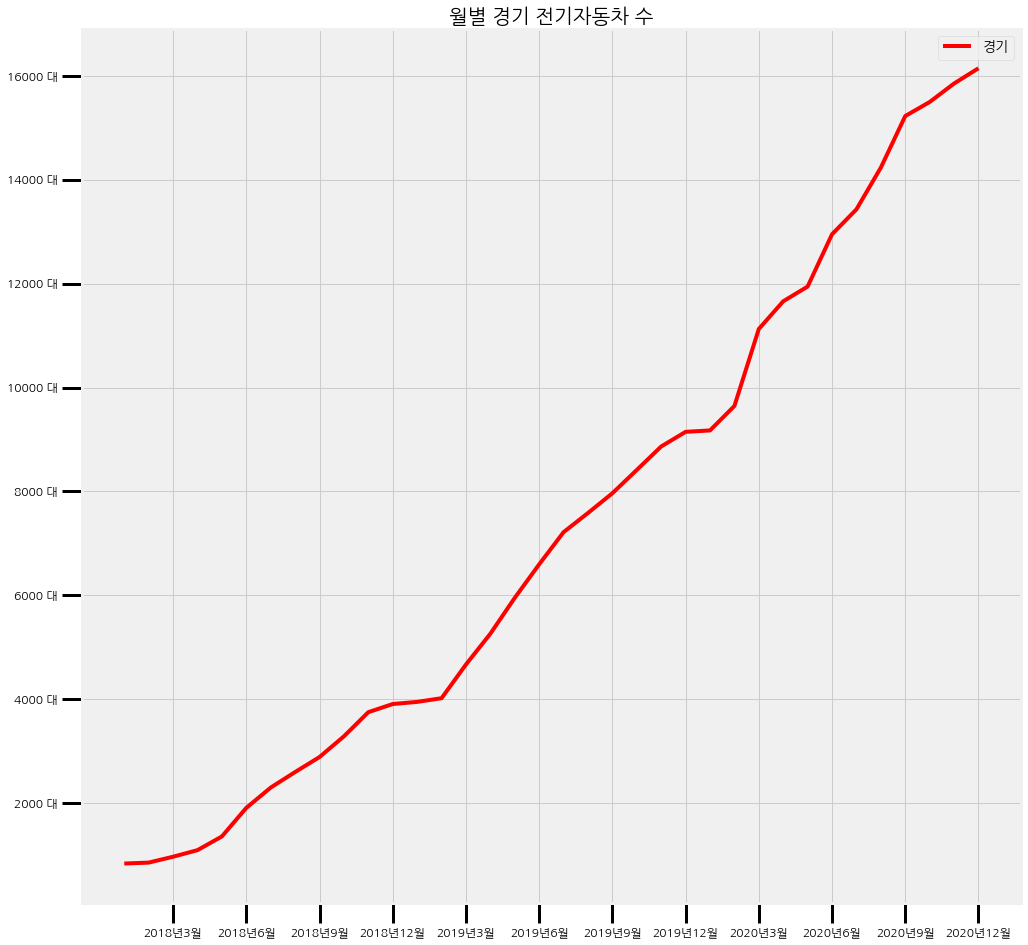

In [5]:
plt.rc('font', family='NanumGothic')

fig = plt.figure(figsize=(15,15))
fig.set_facecolor('white')
ax = fig.add_subplot(1,1,1)

xticks = ax.get_xticks()
ax.plot(line,data_s,marker='',label='경기', color = 'r')
ax.set_xticks(line[2::3]) #2번째 열부터 모든 열 3칸씩 증가하기
ax.tick_params(labelsize =12 , length = 20, width =3)
#plt.xlabel('월', fontsize = '20' , loc = 'left')
#plt.xlabel('x axis', fontsize=14, labelpad=20.0)
plt.xticks()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.lf 대'))
ax.legend()
plt.title('월별 경기 전기자동차 수',fontsize=20)
plt.show()

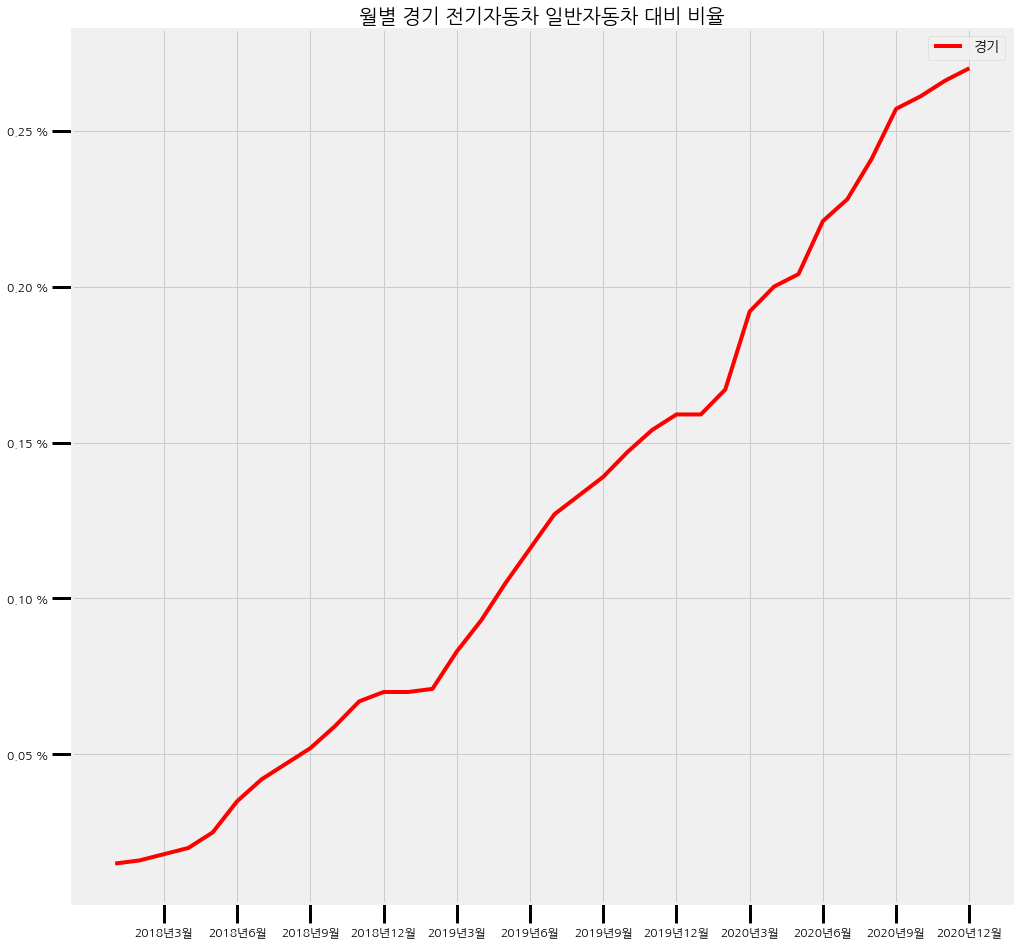

In [6]:
plt.rc('font', family='NanumGothic')

fig = plt.figure(figsize=(15,15))
fig.set_facecolor('white')
ax = fig.add_subplot(1,1,1)
xticks = ax.get_xticks()
ax.plot(line,percentage_s,marker='',label='경기', color = 'r')
ax.set_xticks(line[2::3])
ax.tick_params(labelsize =12 , length = 20, width =3)
#plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2lf %%')) #y축 라벨 뒤에 % 표시
#plt.xlabel('월' , fontsize = "30" , loc = 'right')
#plt.ylabel("비율 %", fontsize = "30" ,rotation ="360")
ax.legend()
plt.title('월별 경기 전기자동차 일반자동차 대비 비율',fontsize=20)
plt.show()